In [ ]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


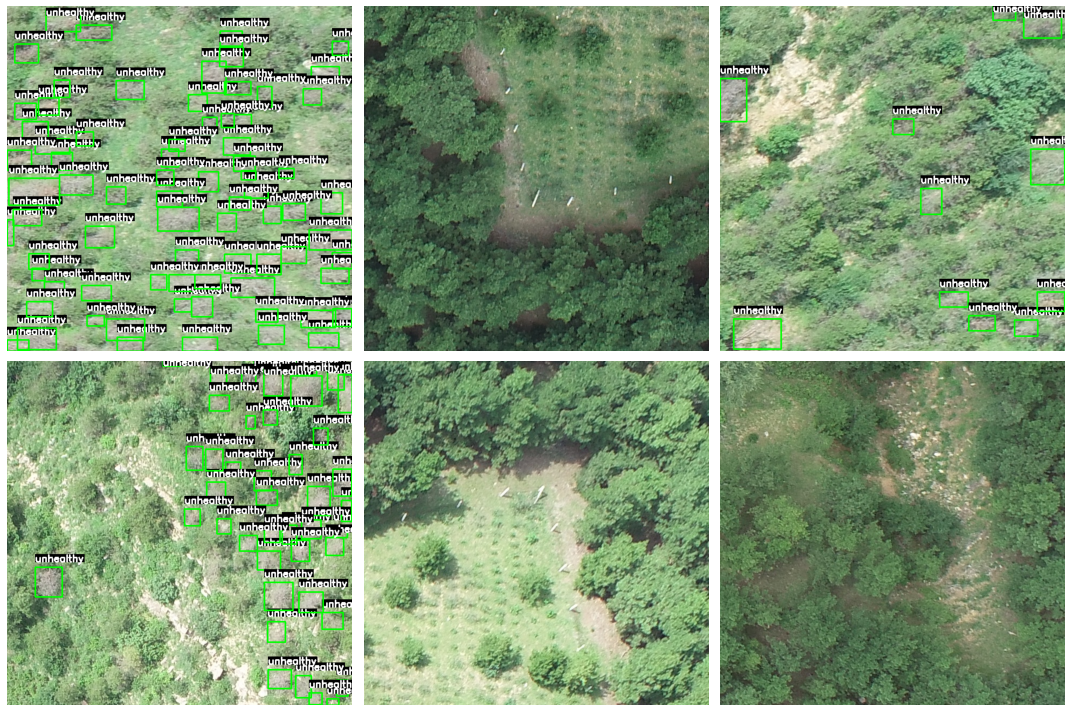

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/train/images"
labels_folder = "/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y), (0, 0, 0), -1)
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11l.pt")

100%|██████████| 49.0M/49.0M [00:05<00:00, 8.96MB/s]


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=50, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11l', name='Large_try',
            batch=32, device=device, seed=69)

New https://pypi.org/project/ultralytics/8.3.64 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=data.yaml , epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11l, name=Large_try, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

train: Scanning /home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/train/labels.cache... 4536 images, 1330 backgrounds, 0 corrupt: 100%|██████████| 4536/4536 [00:00<?, ?it/s]
val: Scanning /home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/val/labels.cache... 567 images, 168 backgrounds, 0 corrupt: 100%|██████████| 567/567 [00:00<?, ?it/s]


Plotting labels to YOLO11l/Large_try/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to YOLO11l/Large_try
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      22.3G      1.575      1.234      1.244        640        640: 100%|██████████| 142/142 [01:08<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]

                   all        567      12655      0.744      0.547      0.674      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      22.7G      1.298     0.8355      1.092        451        640: 100%|██████████| 142/142 [01:04<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]

                   all        567      12655      0.717      0.784      0.808      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      24.3G      1.283     0.8084      1.087        502        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]

                   all        567      12655      0.798      0.774      0.858      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      24.2G      1.263      0.803       1.08        516        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]

                   all        567      12655      0.803      0.816       0.88      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      22.2G      1.235      0.772      1.071        494        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.16it/s]

                   all        567      12655       0.82      0.785       0.87      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      24.5G      1.225     0.7603      1.065        351        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]

                   all        567      12655      0.776      0.819      0.877      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      24.8G      1.201     0.7278      1.054        762        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]

                   all        567      12655      0.846      0.819      0.895      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      24.6G      1.206      0.724      1.052        514        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.16it/s]

                   all        567      12655      0.835      0.804      0.887      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      24.5G      1.181     0.7169      1.043        394        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]

                   all        567      12655      0.779      0.791      0.857      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      23.1G      1.177     0.7007      1.043        394        640: 100%|██████████| 142/142 [01:02<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.16it/s]

                   all        567      12655      0.823       0.84      0.904      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      23.1G      1.175     0.7008       1.04        671        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.16it/s]

                   all        567      12655      0.821      0.828      0.898      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      24.1G      1.166     0.6897      1.041        565        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]

                   all        567      12655      0.863      0.834      0.917      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      23.1G      1.153     0.6831      1.033        752        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]

                   all        567      12655      0.741        0.8      0.854      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      24.6G      1.147      0.666      1.035        789        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        567      12655      0.841      0.842      0.909      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      22.2G      1.143     0.6654      1.034        635        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        567      12655      0.865      0.847      0.921      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      22.1G      1.138     0.6548      1.025        705        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]

                   all        567      12655      0.806      0.852      0.902      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      23.7G      1.133     0.6564      1.024       1060        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]

                   all        567      12655       0.86      0.851      0.925      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      22.5G      1.119     0.6477      1.022        525        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        567      12655      0.865      0.841      0.923       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      23.9G      1.117     0.6353      1.021        608        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        567      12655      0.865      0.867      0.931      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      23.1G      1.119     0.6364      1.019        701        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        567      12655       0.86      0.863      0.929      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      23.7G      1.115     0.6296      1.022        668        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        567      12655      0.818      0.866      0.911      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      24.2G      1.109     0.6283      1.021        424        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        567      12655      0.843      0.851      0.919      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      22.1G      1.104     0.6245      1.018        790        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        567      12655      0.861       0.85      0.922      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      22.9G      1.098     0.6207      1.015        499        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]

                   all        567      12655       0.86      0.864      0.928      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      22.9G      1.089      0.614       1.01        842        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        567      12655      0.853      0.868      0.928      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      22.9G      1.088     0.6101      1.008        892        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.16it/s]

                   all        567      12655      0.849       0.86      0.926      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      24.5G      1.092     0.6105      1.009        593        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        567      12655      0.815       0.87      0.917      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      23.6G      1.088     0.6034      1.013        486        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        567      12655      0.864      0.867      0.931      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      23.4G      1.078     0.5931      1.002        408        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.16it/s]

                   all        567      12655      0.867      0.869      0.933      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      22.5G      1.073     0.5916      1.005        604        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]

                   all        567      12655      0.883      0.868      0.938      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      23.2G      1.063     0.5822      1.001        511        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        567      12655      0.848      0.867      0.926      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      21.9G      1.067     0.5878      1.006        727        640: 100%|██████████| 142/142 [01:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]

                   all        567      12655      0.881       0.87      0.939      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      22.6G      1.062      0.583     0.9988        774        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]

                   all        567      12655      0.877      0.875      0.939      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      22.9G       1.05     0.5737     0.9959        440        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        567      12655      0.835      0.869      0.923       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      22.2G      1.047     0.5668     0.9959        625        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        567      12655      0.874      0.876      0.938      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50        24G      1.045     0.5669     0.9957        511        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        567      12655      0.852      0.866      0.928      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      22.5G      1.045     0.5627     0.9934        784        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.16it/s]

                   all        567      12655       0.87      0.874      0.938      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      22.6G      1.042     0.5616     0.9949        610        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        567      12655      0.859      0.878      0.934      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      22.3G      1.032     0.5541      0.988        720        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        567      12655      0.873      0.876      0.939      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      23.9G      1.033     0.5514     0.9899        553        640: 100%|██████████| 142/142 [01:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        567      12655      0.867       0.88      0.937      0.668


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        22G      1.038     0.5541      1.022        444        640: 100%|██████████| 142/142 [01:02<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        567      12655      0.872      0.875      0.937      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      22.2G       1.02     0.5436      1.016        213        640: 100%|██████████| 142/142 [01:01<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]

                   all        567      12655      0.873      0.883      0.941       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        22G      1.017     0.5361      1.016        264        640: 100%|██████████| 142/142 [01:01<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]

                   all        567      12655       0.86      0.881      0.935      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      22.2G      1.006     0.5269      1.011        388        640: 100%|██████████| 142/142 [01:01<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]

                   all        567      12655      0.874       0.88       0.94      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        22G      1.005     0.5271      1.009        368        640: 100%|██████████| 142/142 [01:02<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]

                   all        567      12655       0.87       0.88      0.938      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      22.2G     0.9972     0.5185      1.006        352        640: 100%|██████████| 142/142 [01:02<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]

                   all        567      12655      0.869      0.881       0.94      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      21.9G     0.9883       0.51      1.003        272        640: 100%|██████████| 142/142 [01:02<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        567      12655      0.868      0.881      0.938      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      21.9G     0.9956     0.5107      1.008        343        640: 100%|██████████| 142/142 [01:02<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]

                   all        567      12655      0.875      0.877       0.94      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        22G     0.9759     0.5016     0.9989        156        640: 100%|██████████| 142/142 [01:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        567      12655      0.866      0.884      0.939      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        22G      0.974     0.4965     0.9976        431        640: 100%|██████████| 142/142 [01:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        567      12655      0.875      0.879       0.94      0.673



50 epochs completed in 0.956 hours.
Optimizer stripped from YOLO11l/Large_try/weights/last.pt, 51.2MB
Optimizer stripped from YOLO11l/Large_try/weights/best.pt, 51.2MB

Validating YOLO11l/Large_try/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.10s/it]


                   all        567      12655      0.873      0.882      0.941      0.679
Speed: 0.1ms preprocess, 3.6ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to YOLO11l/Large_try


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f165c4003d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
df = pd.read_csv('YOLO11l/Large_try/results.csv')

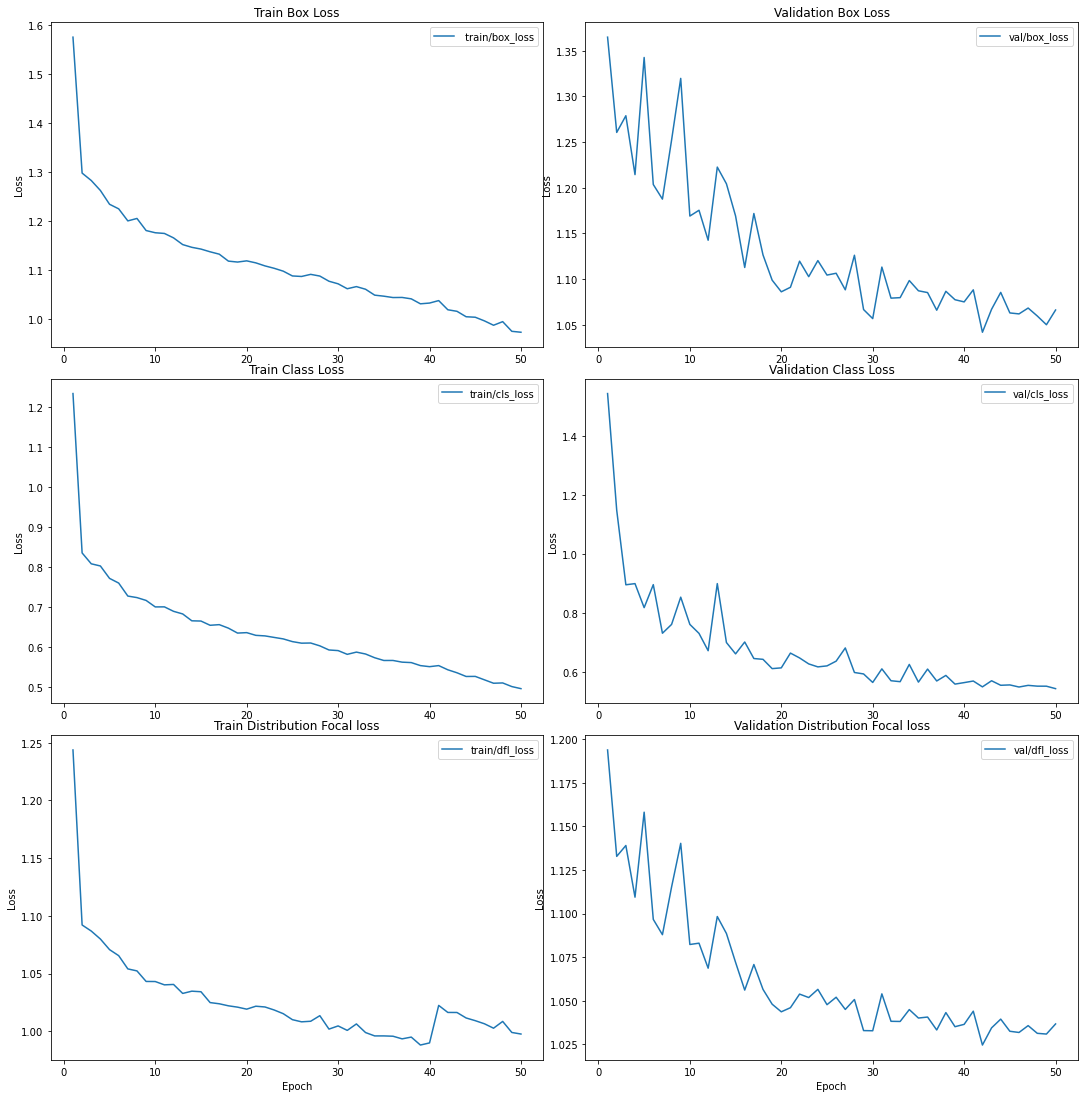

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

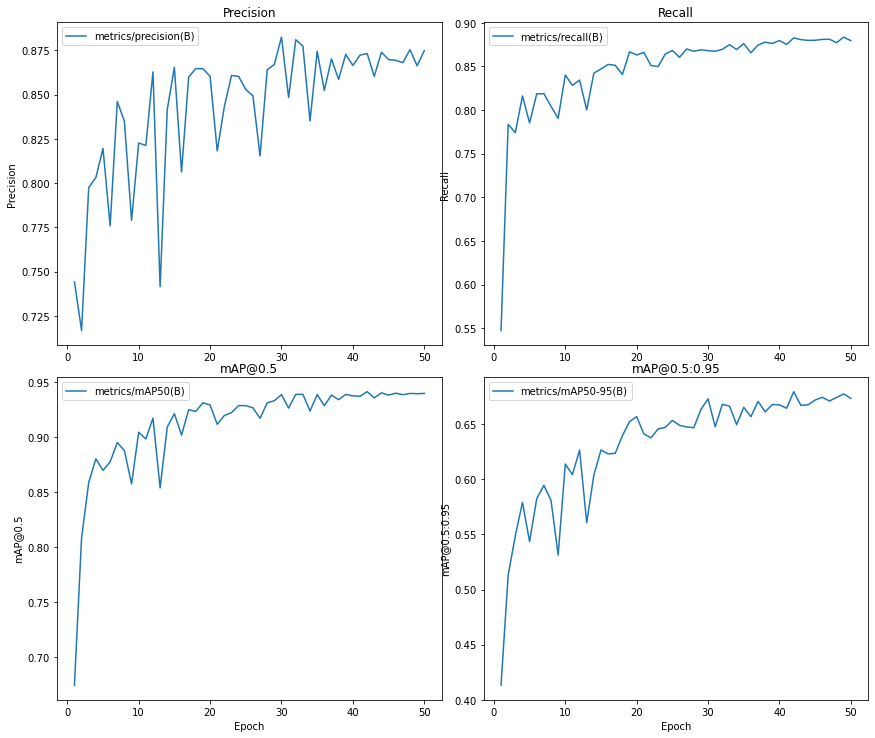

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

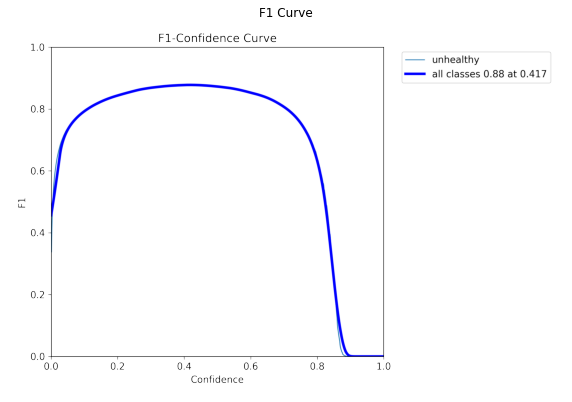

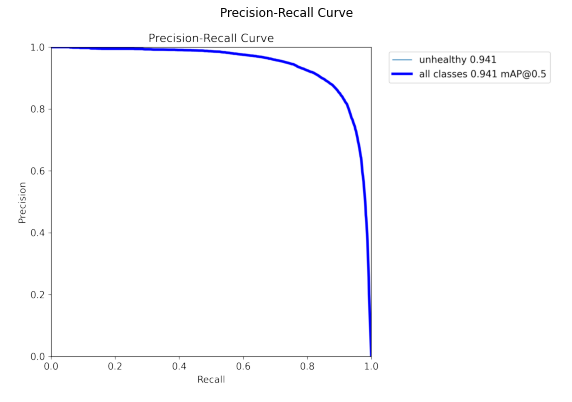

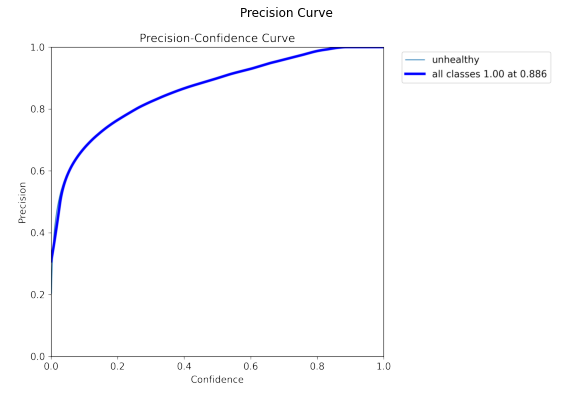

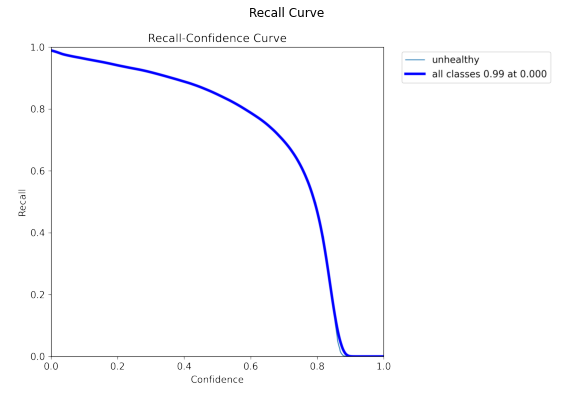

In [9]:
# F1_curve.png
f1_curve = Image.open("YOLO11l/Large_try/F1_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis("off")
plt.show()

# PR_curve.png
pr_curve = Image.open("YOLO11l/Large_try/PR_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(pr_curve)
plt.title("Precision-Recall Curve")
plt.axis("off")
plt.show()

# P_curve.png
p_curve = Image.open("YOLO11l/Large_try/P_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(p_curve)
plt.title("Precision Curve")
plt.axis("off")
plt.show()

# R_curve.png
r_curve = Image.open("YOLO11l/Large_try/R_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(r_curve)
plt.title("Recall Curve")
plt.axis("off")
plt.show()

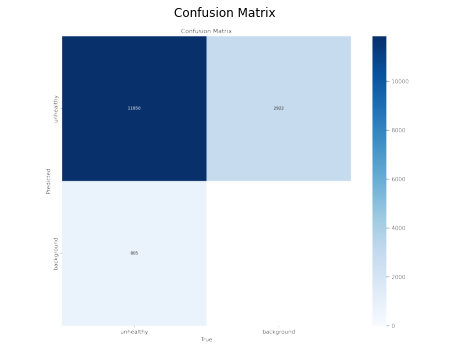

In [10]:
confusion_matrix = Image.open("YOLO11l/Large_try/confusion_matrix.png")
plt.figure(figsize=(12, 6))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/test/images/images_(35)_0004.jpg: 640x640 64 unhealthys, 17.5ms
Speed: 1.1ms preprocess, 17.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


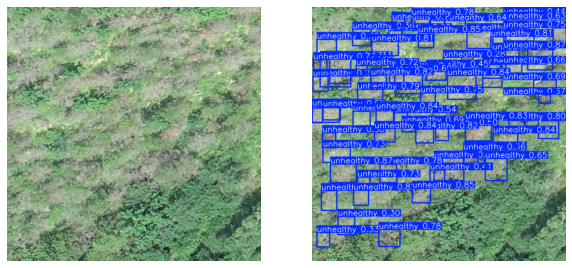

In [11]:
res = model('/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/test/images/images_(35)_0004.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/test/images/images_(35)_0004.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();